## Trabalho 1: Regressão polinomial (até 5ª ordem) para ajuste de curva a 3 conjuntos de dados
### Disciplina: Problemas Inversos II
### Professor: Raphael Vieira Menezes de Souza
### Aluno: Matheus Klatt


1) Importando os módulos que contém as funções necessárias a realização do trabalho

In [1]:
#1)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

2) Leitura do arquivo "dados1.txt", o qual contém os dados das abscissas ($x^1$) e das três formas da variável ordenada ($d$, $d + \Delta$ e $d + \Delta$ + outliers)

In [2]:
#2)
# Usando a função pandas.read_csv para ler o arquivo com os dados, "dados1.csv".
# O arquivo foi previamente convertido para o formato .csv.
trab1_df=pd.read_csv("dados1.txt",header=None,sep=" ",names=[r"$x^1$","d","d_delta","d_delta_outliers"])

3) Criando as variáveis correspondentes as diferentes ordens polinomiais, $x^0$, $x^2$, $x^3$, $x^4$, $x^5$ a partir da variável $x^1$ lida do arquivo.

In [3]:
#3)
# Organizando as colunas do dataframe criado, especificamente criando as demais colunas da variável preditora X.
# As variáveis em X são apenas polinômios de diferentes ordens [n = 0 : 5].
# O polinômio de ordem 1, x1 foi lido do arquivo, os outros graus polinomiais são criados a partir dele.

trab1_df[r"$x^0$"]=trab1_df[r"$x^1$"]*0 + 1.0
trab1_df[r"$x^2$"]=trab1_df[r"$x^1$"]**2
trab1_df[r"$x^3$"]=trab1_df[r"$x^1$"]**3
trab1_df[r"$x^4$"]=trab1_df[r"$x^1$"]**4
trab1_df[r"$x^5$"]=trab1_df[r"$x^1$"]**5

4) Reordenando as colunas do dataframe que contém todas as variáveis do problema para uma visualização mais conveniente

In [4]:
#4)
# Organizando as colunas de cada variável no dataframe completo, 6 variáveis preditoras, e 3 variáveis preditas
trab1_df=trab1_df[[r"$x^0$",r"$x^1$",r"$x^2$",r"$x^3$",r"$x^4$",r"$x^5$","d","d_delta","d_delta_outliers"]]

5) Visualizando o dataframe que contém os dados, e verificando que foram lidos, criados e agrupados corretamente

In [5]:
#5)
# Vericando que os dados foram lidos e criados corretamente
trab1_df

,$x^0$,$x^1$,$x^2$,$x^3$,$x^4$,$x^5$,d,d_delta,d_delta_outliers
0,1.0,0.0,0.00,0.000,0.0000,0.00000,1.0000,1.9400,1.9400
1,1.0,0.1,0.01,0.001,0.0001,0.00001,1.0500,1.6700,1.6700
2,1.0,0.2,0.04,0.008,0.0016,0.00032,1.1603,0.3803,0.3803
3,1.0,0.3,0.09,0.027,0.0081,0.00243,1.3311,2.1711,2.1711
4,1.0,0.4,0.16,0.064,0.0256,0.01024,1.5626,1.6026,1.6026
...,...,...,...,...,...,...,...,...,...
95,1.0,9.5,90.25,857.375,8145.0625,77378.09375,307.9450,308.2350,308.2350
96,1.0,9.6,92.16,884.736,8493.4656,81537.26976,314.7894,314.3294,300.0000
97,1.0,9.7,94.09,912.673,8852.9281,85873.40257,321.7169,321.0069,321.0069
98,1.0,9.8,96.04,941.192,9223.6816,90392.07968,328.7277,327.8577,327.8577


6) Montagem do problema na forma matricial: $\mathbf{d} = \mathbf{G}\mathbf{m}$. Nesta forma o vetor $\mathbf{d}$ guarda a variável predita/dependente, a matriz $\mathbf{G}$ contém as variáveis independentes/preditores e o vetor $\mathbf{m}$ corresponde aos coeficientes/parâmetros que se deseja obter pela solução do problema inverso.

$\begin{equation}
\mathbf{d}_{100 x 1} = \mathbf{G}_{100 x 6} \cdot \mathbf{m}_{6 x 1} = 
\begin{bmatrix}
1.0\\
\vdots\\
335.8220
\end{bmatrix}
=
\begin{bmatrix}
1.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0\\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots\\
1.0 & 9.9 & 98.01 & 970.299 & 9605.9601 & 95099.00499\\
\end{bmatrix}
\cdot
\begin{bmatrix}
m_{0}\\
\vdots\\
m_{6}\\
\end{bmatrix}
\end{equation}$


In [6]:
#6)
# Montando o sistema na forma d = G m
G=trab1_df[[r"$x^0$",r"$x^1$",r"$x^2$",r"$x^3$",r"$x^4$",r"$x^5$"]].to_numpy()
d=trab1_df["d"].to_numpy().reshape((-1,1))
d_delta=trab1_df["d_delta"].to_numpy().reshape((-1,1))
d_delta_outliers=trab1_df["d_delta_outliers"].to_numpy().reshape((-1,1))
d_all=np.hstack((d,d_delta,d_delta_outliers))
# Exibindo formato das matrizes criadas para garantir que as dimensões estão corretas
print("Shape G: ",G.shape,"Shape d: ",d.shape,"Shape d_delta: ",d_delta.shape,
      "Shape d_delta_outliers: ",d_delta_outliers.shape, "Shape d_all: ",d_all.shape)

Shape G:  (100, 6) Shape d:  (100, 1) Shape d_delta:  (100, 1) Shape d_delta_outliers:  (100, 1) Shape d_all:  (100, 3)


7) O fato das colunas da matriz  serem $\textbf{linearmente independentes}$ permite que $\mathbf{G}$ tenha inversa e consequentemente uma solução pode ser obtida pela aplicação das equações normais:

$\begin{equation}
\mathbf{m} = (\mathbf{G}^{T}\mathbf{G})^{-1}\mathbf{G}^T\mathbf{d}
\end{equation}$

A álgebra matricial permite resolver este sistema uma única vez para os 3 conjuntos de dados diferentes, $\mathbf{d}$, $\mathbf{d} + \Delta$ e $\mathbf{d} + \Delta$ + $outliers$, agrupando-os como colunas de uma única matriz $\mathbf{D}$. Neste caso serão obtidos os parâmetros referentes aos três diferentes modelos em cada uma das colunas da matriz $\mathbf{M}$. A expressão para as equações normais toma então a seguinte forma

$\begin{equation}
\mathbf{M}_{6 x 3} = (\mathbf{G}^{T}_{6 x 100}\mathbf{G}_{100 x 6})^{-1}\mathbf{G}^T_{6 x 100}\mathbf{D}_{100 x 3}
\end{equation}$

In [7]:
#7)
# Resolvendo o sistema na forma m = (G.T G)-1 G.T d, (norma L2)
# Primeiro calculando a inversa de G.T G
inv_G=np.linalg.inv(np.matmul(G.T,G))
# Calculando G.T d
GTd=np.matmul(G.T,d_all)
# multiplicando (G.T G)-1 e G.T d para obter m
m=np.matmul(inv_G,GTd)
#colocando m na forma de vetor coluna
m=m.reshape((len(m),3))

8) Verificando os diferentes modelos/parâmetros obtidos em cada uma das colunas de $\mathbf{M}$. A primeira coluna $\mathbf{M}_{:,1}$ corresponde aos parâmetros ajustados aos dados $\mathbf{d}$, a segunda coluna, $\mathbf{M}_{:,2}$ está relacionada a $\mathbf{d} + \Delta$, e a terceira coluna, $\mathbf{M}_{:,3}$, diz respeito aos parâmetros estimados para $\mathbf{d} + \Delta$ + $outliers$.

In [8]:
#8)
# verificando os parametros calculados para m
m

array([[ 9.99989940e-01,  1.67161918e+00,  3.26895635e+00],
       [ 2.00020865e-01, -1.38503246e+00, -7.55755214e+00],
       [ 2.99998706e+00,  3.95127071e+00,  9.65135460e+00],
       [ 4.00033270e-02, -1.82394686e-01, -2.06532350e+00],
       [-3.74504419e-07,  2.24606681e-02,  2.71486093e-01],
       [ 1.52740278e-08, -8.23143358e-04, -1.21499810e-02]])

9) A solução pela minimização da norma L1 é aqui construída iterativamente com o algoritmo $\textit{IRLS}$ ("Iteratively  Reweighted Least Squares"). Partindo de um modelo inicial, $\mathbf{m}_0$ (normalmente a solução obtida para minimização da norma L2), pode-se mostrar que o método IRLS converge para uma solução que minimiza a norma L1.

Neste método o objetivo a cada passo da iteração, é minimizar a expressão

$\begin{equation}
\mathbf{r} = (\mathbf{d} - \mathbf{G}\mathbf{m})
\end{equation}$

Na qual $\mathbf{r}$ é o vetor de resíduos que guarda as diferenças entre os valores reais $\mathbf{d}$ e os dados preditos $\mathbf{G}\mathbf{m}$, obtidos para o melhor modelo $\mathbf{m}$ ajustado até então.

A minimização da norma L1 envolve a derivação de $||\mathbf{r}||_{1}$ em relação aos parâmetros $\mathbf{m}$. Este gradiente pode ser representado pela seguinte expressão

$\begin{equation}
\mathbf{G}^{T}\mathbf{R}\mathbf{G}\mathbf{m} = \mathbf{G}^{T}\mathbf{R}\mathbf{d}
\end{equation}$

Na qual $\mathbf{R}_{m x m}$ é uma matriz diagonal que contém como elementos não nulos os valores absolutos do recíproco do vetor de resíduos ($\large\frac{1}{\mathbf{r}}$), e é chamada de matriz ponderadora. Como os elementos de $\mathbf{R}$ representam uma relação não linear entre $\mathbf{r}$ e $\mathbf{m}$ o sistema não pode ser resolvido diretamente, o que leva a resolução por um método iterativo como o $\textit{IRLS}$.

O algoritmo usa como modelo inicial a solução obtida para minimização da norma L2

$\begin{equation}
\mathbf{m}_{0} = \mathbf{m}_{L2}
\end{equation}$

O primeiro vetor de resíduos é calculado com base neste modelo inicial

$\begin{equation}
\mathbf{r}_{0} = \mathbf{d} - \mathbf{G}\mathbf{m}_{0}
\end{equation}$

para construção da matriz ponderadora inicial,

$\begin{equation}
\mathbf{R}_{0} =  \large\frac{1}{\mathbf{r}_{0}}
\end{equation}$

Com $\mathbf{R}_{0}$ é possível resolver então o seguinte sistema para obter o novo modelo $\mathbf{m}_{1}$

$\begin{equation}
\mathbf{m}_{1} =  (\mathbf{G}^{T}\mathbf{R_{0}}\mathbf{G})^{-1}\mathbf{G}^{T}\mathbf{R_{0}}\mathbf{d}
\end{equation}$

e então calcular o vetor de resíduos correspondente a este novo modelo, $\mathbf{r}_{1}$

$\begin{equation}
\mathbf{r}_{1} = \mathbf{d} - \mathbf{G}\mathbf{m}_{1}
\end{equation}$

Este processo é repetido até que haja convergência dos vetores de modelo ($\mathbf{m}$) e resíduo ($\mathbf{r}$). 

Uma maneira tipicamente utilizada para se verificar a convergência das iterações é a adoção de um critério de tolerância $\tau$. Ao atingir um valor menor ou igual ao critério de tolerância estabelecido considera-se que o algoritmo atingiu a convergência. Uma regra normalmente adotada para se mensurar a tolerância obtida para um modelo ajustado num passo de iteração $k + 1$ do algoritmo é:

$\begin{equation}
\large\frac{||\mathbf{m}_{k+1} - \mathbf{m}_{k}||_{2}}{1 + ||\mathbf{m}_{k+1}||_{2}} \normalsize< \tau
\end{equation}$

Deve-se tomar cuidado com a possibilidade de elementos nulos em $\mathbf{r}$, já que isso implicará num valor indefinido na matriz $\mathbf{R}$. Uma maneira prática de se evitar este problema é truncar, quando ocorrerem, os valores nulos para valores pequenos próximos a 0, formalmente

$\begin{equation}
|r_{i}| < \epsilon
\end{equation}$

$\begin{equation}
R_{i,i} = \large\frac{1}{\epsilon}
\end{equation}$

Isto garante que a convergência da solução pelo algoritmo $\textit{IRLS}$ para a solução que minimiza a norma L1.

In [9]:
#9)
# Resolvendo o sistema pela minimizacao da norma L1 com o algoritmo iterativo IRLS (pg.46-47).
# Utilizando o modelo m, obtido pela solução da norma L2, como modelo inicial (m0), deseja-se resolver o sistema:
# G.T R G (mk) = G.T R d, para mk,
# onde a matriz R é diagonal e tem como elementos não nulos os reciprocos dos residuos r = |G m - d|
# A soluçao pelo algoritmo IRLS é construida iterativamente, começando com a solução da norma L2, m0. 
# O resíduo correspondente a esta solução é calculado r0 = |G m0 - d|, para montagem da matriz R = R0
# Resolve-se então o sistema: G.T R0 G (m1) = G.T R0 d, para m1, e calcula-se o novo vetor de residuo r1
# Este processo é repetido até que ocorra convergência de mk e rk, ou até um critério de tolerãncia ser atingido

m_L1_all=np.zeros((len(m),len(m[0,:])))
m_=np.copy(m)

for j in range (0,len(m[0,:])):
    # Definição dos critérios de parada do algoritmo, tolerância (tol) e número máximo de iterações (max_iterations)
    mk=m_[:,j].reshape((-1,1))
    d_=d_all[:,j].reshape((-1,1))
    tol=0.001
    max_iterations=1000
    current_iteration=0
    # Tolerância inicial que garante que o laço seja executado ao menos uma vez
    t=999.999

    # Calculo do vetor de residuo inicial (r0) utilizando o modelo inicial m0, solução da norma L2
    r0=d_-np.matmul(G,mk)
    # Criação da matriz diagonal R0
    R_0=np.eye(len(r0[:,0]))*1/r0
    # Atribuição do modelo inicial, m0, a variável (mk) que será iterativamente atualizada no laço
    
    # Atribuição do da matriz de pesos inicial, R0, a variável (R) que será iterativamente atualizada no laço
    R=R_0

    # Laço de resolução iterativa de: G.T R G (mk) = G.T R d
    while (t >= tol):
        # Contador de iterações
        current_iteration=current_iteration+1
        # Verifica se número máximo de iterações foi atingido
        if (current_iteration == max_iterations):
            print("Reached max number of iterations: {}".format(max_iterations))
            break

        #Início da resolução de G.T R G (mk) = G.T R d:
        # Lado esquerdo da igualdade
        # Calculo de G.T R
        GT_R_arr=np.matmul(G.T,R)
        # Calculo de G.T R G
        GT_R_G_arr=np.matmul(GT_R_arr,G) 

        # Lado direito da igualdade
        # Calculo de G.T R d
        GT_R_d_arr=np.matmul(GT_R_arr,d_)
        # passando G.T R G para o lado direito da igualdade, tal que: (mk) = (G.T R G)-1 G.T R d
        # Calculo de (G.T R G)-1
        GT_R_G_inv_arr=np.linalg.inv(GT_R_G_arr)
        # Calculo de (mk) = (G.T R G)-1 G.T R d
        mkp1=np.matmul(GT_R_G_inv_arr,GT_R_d_arr)

        # Atualização do critério de tolerância para a iteração atual (regra definida na pg. 47)
        t = np.sqrt(np.sum((mkp1-mk)**2))/(1+np.sqrt(np.sum((mkp1)**2)))
        # Atualização do melhor modelo obtido para o modelo (mk) obtido na iteração atual
        mk=mkp1
        # Calculo do novo vetor de residuos obtido agora com o modelo mk
        rk=abs(d_-np.matmul(G,mk))
        # Truncamento dos residuous muito pequenos, os quais podem causar instabilidade no algoritmo (pg. 47)
        rk[rk<1e-5]=1e-5
        # Criação da nova matriz de pesos R, utilizando o novo vetor de resíduos rk
        R=np.eye(len(rk[:,0]))*rk

        # Verficação se o critério de tolerância foi alcançado para definir se o algoritmo deve continuar
        if (t <= tol):
            print("Reached tolerance: {} <= {}".format(t,tol))
    mk=mk.reshape((len(mk))) 
    m_L1_all[:,j]=mk
# Após término do laço coloca o melhor modelo obtido (mk) no formato de vetor coluna        
   

Reached tolerance: 2.9226932655787982e-05 <= 0.001
Reached max number of iterations: 1000
Reached max number of iterations: 1000


10) Verificando os diferentes modelos/parâmetros obtidos em cada uma das colunas de $\mathbf{M}_{L1}$. 

In [10]:
#10)
# Verificação do modelo  mk obtido pela solução iterativa da norma L1
print("Modelo que minimiza a norma L1 (obtido por IRLS): \n", np.round(m_L1_all,2))
# Impressão do modelo obtido pelas equações normais para comparação
print("Modelo que minimiza a norma L2 (obtido pelas equações normais): \n", np.round(m_,2))

Modelo que minimiza a norma L1 (obtido por IRLS): 
 [[ 1.    1.45  3.4 ]
 [ 0.2  -0.99 -7.41]
 [ 3.    3.74  9.37]
 [ 0.04 -0.14 -1.95]
 [ 0.    0.02  0.25]
 [-0.   -0.   -0.01]]
Modelo que minimiza a norma L2 (obtido pelas equações normais): 
 [[ 1.    1.67  3.27]
 [ 0.2  -1.39 -7.56]
 [ 3.    3.95  9.65]
 [ 0.04 -0.18 -2.07]
 [-0.    0.02  0.27]
 [ 0.   -0.   -0.01]]


11) Computando a matriz de dados preditos, $\mathbf{\hat{D}}_{L2}$, utilizando os modelos obtidos pela solução para norma L2. Cada coluna da matriz corresponde a predições feitas com cada um dos três diferentes modelos ajustados para os três diferentes conjuntos de dado ($\mathbf{d} + \Delta$ e $\mathbf{d} + \Delta$ + $outliers$).

In [11]:
#11)
# Predição com modelo obtido pela solução da norma L2: d_hat = G m
d_hat_l2=np.matmul(G,m)

12) Computando a matriz de dados preditos, $\mathbf{\hat{D}}_{L1}$, utilizando os modelos obtidos pela solução para norma L1. Cada coluna da matriz corresponde a predições feitas com cada um dos três diferentes modelos ajustados para os três diferentes conjuntos de dado ($\mathbf{d}$, $\mathbf{d} + \Delta$ e $\mathbf{d} + \Delta$ + $outliers$).

In [12]:
#12)
# Predição com modelo obtido pela solução da norma L1: d_l1 = G mk
d_hat_l1=np.matmul(G,m_L1_all)

13) Uma das métricas que pode ser utilizada para se avaliar a qualidade do modelo/parâmetros obtidos é o cálculo do erro médio quadrático entre os dados estimados e dados reais, a expressão é assim definida

$\begin{equation}
MSE_{L2} =  \large\frac{\sum_{i=1}^{m}(d_{i} - \hat{d}_{i})^{2}}{m}
\end{equation}$

Onde $\mathbf{d}$ e $\mathbf{\hat{d}}$ são colunas de cada uma das matrizes $\mathbf{D}$ e $\mathbf{\hat{D}}$ respectivamente. Cada coluna dessas matrizes é correspondente aos três diferentes conjuntos de dados ($\mathbf{d}$, $\mathbf{d} + \Delta$ e $\mathbf{d} + \Delta$ + $outliers$).

In [13]:
#13)
# Verificaçao do erro médio quadrático (MSE) obtido com as predições pelo modelo da norma L2
MSE_L2_list=[]
for j in range(0,len(d_all[0,:])):
    MSE_L2=np.sum(np.add(d_all[:,j].ravel(),-d_hat_l2[:,j].ravel())**2)/len(d_all[:,j])
    MSE_L2_list.append(MSE_L2)
    
print("MSE da solução pela norma L2, para (d): {}".format(MSE_L2_list[0]))
print("MSE da solução pela norma L2, para (d + delta): {}".format(MSE_L2_list[1]))
print("MSE da solução pela norma L2, para (d + delta + outliers): {}".format(MSE_L2_list[2]))

MSE da solução pela norma L2, para (d): 7.935243225359561e-10
MSE da solução pela norma L2, para (d + delta): 0.2809118095816746
MSE da solução pela norma L2, para (d + delta + outliers): 25.9269562534377


In [14]:
#14)
# Verificaçao do erro médio quadrático (MSE) obtido com as predições pelo modelo da norma L1
MSE_L1_list=[]
for j in range(0,len(d_all[0,:])):
    MSE_L1=np.sum(np.add(d_all[:,j].ravel(),-d_hat_l1[:,j].ravel())**2)/len(d_all[:,j])
    MSE_L1_list.append(MSE_L1)
    
print("MSE da solução pela norma L1, para (d): {}".format(MSE_L1_list[0]))
print("MSE da solução pela norma L1, para (d + delta): {}".format(MSE_L1_list[1]))
print("MSE da solução pela norma L1, para (d + delta + outliers): {}".format(MSE_L1_list[2]))

MSE da solução pela norma L1, para (d): 1.0133081107408893e-09
MSE da solução pela norma L1, para (d + delta): 0.28413217672125496
MSE da solução pela norma L1, para (d + delta + outliers): 27.557505415237006


15) Visualização das curvas obtidas pela solução da norma L2 (vermelha) e L1 (verde) ajustadas aos dados ($\mathbf{d}$). Para facilitar a visualização das curvas apenas parte dos dados d (60 pontos) foi aleatoriamente selecionada para exibição.

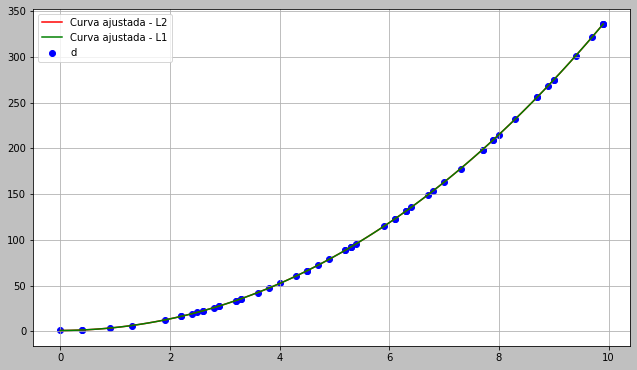

In [15]:
#15)
# Visualização do ajuste dos modelos obtidos aos dados
fig_dt, (ax1)=plt.subplots(1,1,figsize=(10.7,6.2))
points=np.random.choice(np.arange(0,100),60)
x_1=trab1_df[r"$x^1$"].to_numpy()
fig_dt.set_facecolor("silver")
ax1.scatter(x_1[points],d[points],label="d",c="blue")
ax1.plot(x_1,d_hat_l2[:,0],c="red",label="Curva ajustada - L2")
ax1.plot(x_1,d_hat_l1[:,0],c="green",label="Curva ajustada - L1")
#ax1.plot(x_1,d_net.ravel(),c="orange",label="Curva ajustada - NET")
ax1.grid()
ax1.legend()

16) Visualização das curvas obtidas pela solução da norma L2 (vermelha) e L1 (verde) ajustadas aos dados ($\mathbf{d} + \Delta$). Para facilitar a visualização das curvas apenas parte dos dados d (60 pontos) foi aleatoriamente selecionada para exibição.

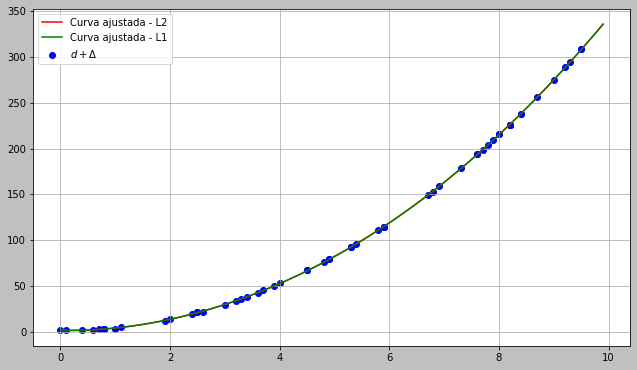

In [16]:
#16)
# Visualização do ajuste dos modelos obtidos aos dados
fig_dt, (ax1)=plt.subplots(1,1,figsize=(10.7,6.2))
points=np.random.choice(np.arange(0,100),60)
x_1=trab1_df[r"$x^1$"].to_numpy()
fig_dt.set_facecolor("silver")
ax1.scatter(x_1[points],d_delta[points],label=r"$d + \Delta$",c="blue")
ax1.plot(x_1,d_hat_l2[:,1],c="red",label="Curva ajustada - L2")
ax1.plot(x_1,d_hat_l1[:,1],c="green",label="Curva ajustada - L1")
ax1.grid()
ax1.legend()

17) Visualização das curvas obtidas pela solução da norma L2 (vermelha) e L1 (verde) ajustadas aos dados ($\mathbf{d} + \Delta$ + $outliers$). Para facilitar a visualização das curvas apenas parte dos dados d (60 pontos) foi aleatoriamente selecionada para exibição. 

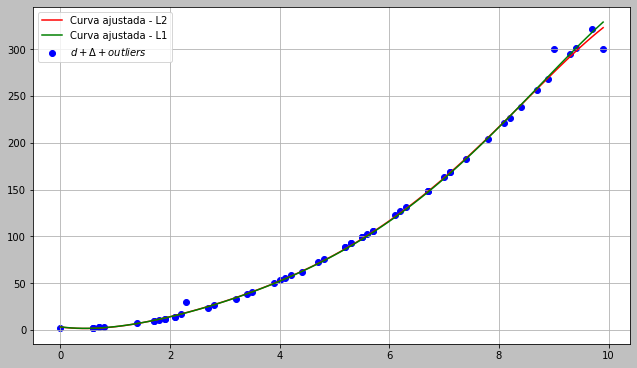

In [17]:
#17)
# Visualização do ajuste dos modelos obtidos aos dados
fig_dt, (ax1)=plt.subplots(1,1,figsize=(10.7,6.2))
points=np.random.choice(np.arange(0,100),60)
x_1=trab1_df[r"$x^1$"].to_numpy()
fig_dt.set_facecolor("silver")
ax1.scatter(x_1[points],d_delta_outliers[points],label=r"$d + \Delta + outliers$",c="blue")
ax1.plot(x_1,d_hat_l2[:,2],c="red",label="Curva ajustada - L2")
ax1.plot(x_1,d_hat_l1[:,2],c="green",label="Curva ajustada - L1")
ax1.grid()
ax1.legend()

### Conclusão 
Os coeficientes obtidos tanto pela minimização da norma L2, quanto pela minimização da norma L1, foram capazes de produzir um polinômio de 5° grau que se ajusta adequadamente aos três diferentes conjuntos de dados ($\mathbf{d} + \Delta$ e $\mathbf{d} + \Delta$ + $outliers$). O MSE dos modelos obtidos das duas diferentes maneiras teve ordens de magnitude comparáveis (mostrado em 13) e 14)) e as curvas obtidas tiveram ajuste semelhante aos dados (mostradoo de 15) a 17)). No entanto, não é possível definir a priori qual o tipo de função produziu os dados observados, uma vez o problema inverso pode ter múltiplas soluções.

In [18]:
####################################################################################################################

### BÔNUS: Análise da qualidade do ajuste de polinômios de diferentes graus (0 a 4) a cada um dos conjuntos de dados, $\mathbf{d}$, $\mathbf{d} + \Delta$ e $\mathbf{d} + \Delta$ + $outliers$

Para facilitar a análise torna-se as rotinas explicitadas anteriormente em funções. Primeira função, PolynomialOrder(G), função que seleciona as colunas da matriz G de acordo com o grau do polinômio que se deseja utilizar. 

In [19]:
def PolynomialOrder(G,order):
    
    G_ = G[:,:order+1]
    
    return(G_)

Segunda função, L2Solution(G,d), função que recebe os elementos G e d e calcula a solução m pela minimização da norma L2 utilizando as equações normais. 

In [20]:
def L2Solution(G,d):

    # Resolvendo o sistema na forma m = (G.T G)-1 G.T d, (norma L2)
    # Primeiro calculando a inversa de G.T G
    inv_G=np.linalg.inv(np.matmul(G.T,G))
    # Calculando G.T d
    GTd=np.matmul(G.T,d)
    # multiplicando (G.T G)-1 e G.T d para obter m
    m=np.matmul(inv_G,GTd)
    #colocando m na forma de vetor coluna
    m=m.reshape((len(m),3))
    
    return(m)

Terceira função, L1Solution(G,d,m), função que recebe os elementos G, d, um modelo inicial m, e calcula a solução pela minimização da norma L1 utilizando o algoritmo IRLS. A função também aceita como argumentos opcionais o número máximo de iterações a serem realizadas (max_iterations), e o critério de tolerância a ser atingido para que o se considere a convergência do método (tol).

In [21]:
def L1Solution(G,d_all,m,max_iterations=1000,tol=0.001):

    m_L1_all=np.zeros((len(m),len(m[0,:])))
    m_=np.copy(m)

    for j in range (0,len(m[0,:])):
        # Definição dos critérios de parada do algoritmo, tolerância (tol) e número máximo de iterações (max_iterations)
        mk=m_[:,j].reshape((-1,1))
        d_=d_all[:,j].reshape((-1,1))
        current_iteration=0
        # Tolerância inicial que garante que o laço seja executado ao menos uma vez
        t=999.999

        # Calculo do vetor de residuo inicial (r0) utilizando o modelo inicial m0, solução da norma L2
        r0=d_-np.matmul(G,mk)
        # Criação da matriz diagonal R0
        R_0=np.eye(len(r0[:,0]))*1/r0
        # Atribuição do modelo inicial, m0, a variável (mk) que será iterativamente atualizada no laço

        # Atribuição do da matriz de pesos inicial, R0, a variável (R) que será iterativamente atualizada no laço
        R=R_0

        # Laço de resolução iterativa de: G.T R G (mk) = G.T R d
        while (t >= tol):
            # Contador de iterações
            current_iteration=current_iteration+1
            # Verifica se número máximo de iterações foi atingido
            if (current_iteration == max_iterations):
                print("Reached max number of iterations: {}".format(max_iterations))
                break

            #Início da resolução de G.T R G (mk) = G.T R d:
            # Lado esquerdo da igualdade
            # Calculo de G.T R
            GT_R_arr=np.matmul(G.T,R)
            # Calculo de G.T R G
            GT_R_G_arr=np.matmul(GT_R_arr,G) 

            # Lado direito da igualdade
            # Calculo de G.T R d
            GT_R_d_arr=np.matmul(GT_R_arr,d_)
            # passando G.T R G para o lado direito da igualdade, tal que: (mk) = (G.T R G)-1 G.T R d
            # Calculo de (G.T R G)-1
            GT_R_G_inv_arr=np.linalg.inv(GT_R_G_arr)
            # Calculo de (mk) = (G.T R G)-1 G.T R d
            mkp1=np.matmul(GT_R_G_inv_arr,GT_R_d_arr)

            # Atualização do critério de tolerância para a iteração atual (regra definida na pg. 47)
            t = np.sqrt(np.sum((mkp1-mk)**2))/(1+np.sqrt(np.sum((mkp1)**2)))
            # Atualização do melhor modelo obtido para o modelo (mk) obtido na iteração atual
            mk=mkp1
            # Calculo do novo vetor de residuos obtido agora com o modelo mk
            rk=abs(d_-np.matmul(G,mk))
            # Truncamento dos residuous muito pequenos, os quais podem causar instabilidade no algoritmo (pg. 47)
            rk[rk<1e-5]=1e-5
            # Criação da nova matriz de pesos R, utilizando o novo vetor de resíduos rk
            R=np.eye(len(rk[:,0]))*rk

            # Verficação se o critério de tolerância foi alcançado para definir se o algoritmo deve continuar
            if (t <= tol):
                print("Reached tolerance: {} <= {}".format(t,tol))
        mk=mk.reshape((len(mk))) 
        m_L1_all[:,j]=mk
    # Após término do laço coloca o melhor modelo obtido (mk) no formato de vetor coluna        


    return(m_L1_all)

Quarta função, PredictMSE(G,m,d), função que faz predições a partir dos modelos/parâmetros estimados, e computa o erro médio quadrático entre predições e dados reais para avaliação da qualidade do modelo ajustado.

In [22]:
def PredictMSE(G,m,d_all):
    
    d_hat=np.matmul(G,m)
    MSE_list=[]
    for j in range(0,len(d_all[0,:])):
        MSE=np.sum(np.add(d_all[:,j].ravel(),-d_hat[:,j].ravel())**2)/len(d_all[:,j])
        MSE_list.append(MSE)

    print("MSE da solução para (d): {}".format(MSE_list[0]))
    print("MSE da solução para (d + delta): {}".format(MSE_list[1]))
    print("MSE da solução para (d + delta + outliers): {}".format(MSE_list[2]))    
    
    return(d_hat)

Quinta função, PlotCurveFits(dataset,d,d_hat_l2,d_hat_l1,set), função que exibe os dados e as curvas ajustadas por cada uma das diferentes soluções obtidas pela minimização da norma L2 e norma L1. O parâmetro d_set permite a escolha de para qual conjunto de dados se deseja plotar as curvas, $\mathbf{d}$, $\mathbf{d} + \Delta$, ou $\mathbf{d} + \Delta$ + $outliers$

In [23]:
def PlotCurveFits(trab1_df,d_all,d_hat_l2,d_hat_l1,d_set):
    # Visualização do ajuste dos modelos obtidos aos dados
    fig_dt, (ax1)=plt.subplots(1,1,figsize=(10.7,6.2))
    points=np.random.choice(np.arange(0,100),60)
    x_1=trab1_df[r"$x^1$"].to_numpy()
    fig_dt.set_facecolor("silver")
    labels=[r"$d$",r"$d + \Delta$",r"$d + \Delta + outliers$"]
    ax1.scatter(x_1[points],d_all[points,d_set],label=labels[d_set],c="blue")
    ax1.plot(x_1,d_hat_l2[:,d_set],c="red",label="Curva ajustada - L2")
    ax1.plot(x_1,d_hat_l1[:,d_set],c="green",label="Curva ajustada - L1")
    ax1.grid()
    ax1.legend()
    
    return()

#### Polinômio de grau 0

Fazendo uso de todas as funções, começamos a análise com o ajuste de um polinômio de grau 0 ao conjunto de dados: $\mathbf{d}$

Reached max number of iterations: 1000
Reached max number of iterations: 1000
Reached max number of iterations: 1000
MSE da solução para (d): 10035.584684696001
MSE da solução para (d + delta): 10034.562549866
MSE da solução para (d + delta + outliers): 9881.9725555025
MSE da solução para (d): 10355.401741205565
MSE da solução para (d + delta): 10348.350552893102
MSE da solução para (d + delta + outliers): 10201.633367146447


()

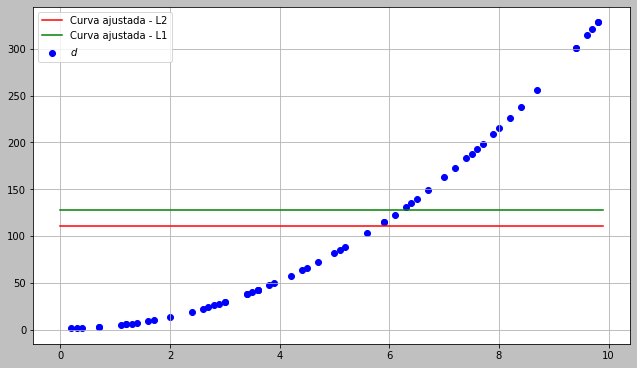

In [24]:
G_=PolynomialOrder(G,0)
ml21=L2Solution(G_,d_all)
ml11=L1Solution(G_,d_all,ml21,1000)
d_hat_l2=PredictMSE(G_,ml21,d_all)
d_hat_l1=PredictMSE(G_,ml11,d_all)
PlotCurveFits(trab1_df,d_all,d_hat_l2,d_hat_l1,0)

Polinômio de grau 0 ajustado ao conjunto de dados: $\mathbf{d} + \Delta$

Reached max number of iterations: 1000
Reached max number of iterations: 1000
Reached max number of iterations: 1000
MSE da solução para (d): 10035.584684696001
MSE da solução para (d + delta): 10034.562549866
MSE da solução para (d + delta + outliers): 9881.9725555025
MSE da solução para (d): 10355.401741205565
MSE da solução para (d + delta): 10348.350552893102
MSE da solução para (d + delta + outliers): 10201.633367146447


()

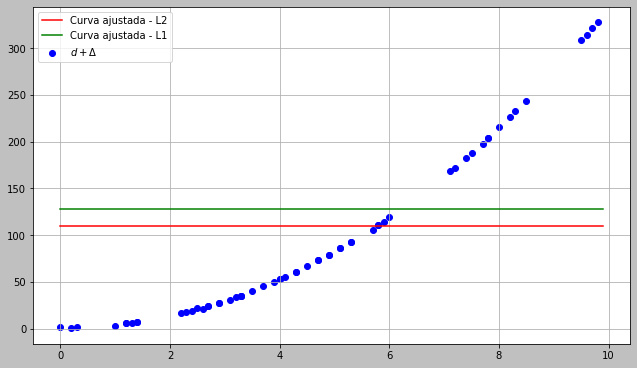

In [25]:
G_=PolynomialOrder(G,0)
ml21=L2Solution(G_,d_all)
ml11=L1Solution(G_,d_all,ml21,1000)
d_hat_l2=PredictMSE(G_,ml21,d_all)
d_hat_l1=PredictMSE(G_,ml11,d_all)
PlotCurveFits(trab1_df,d_all,d_hat_l2,d_hat_l1,1)

Polinômio de grau 0 ajustado ao conjunto de dados: $\mathbf{d} + \Delta + outliers$

Reached max number of iterations: 1000
Reached max number of iterations: 1000
Reached max number of iterations: 1000
MSE da solução para (d): 10035.584684696001
MSE da solução para (d + delta): 10034.562549866
MSE da solução para (d + delta + outliers): 9881.9725555025
MSE da solução para (d): 10355.401741205565
MSE da solução para (d + delta): 10348.350552893102
MSE da solução para (d + delta + outliers): 10201.633367146447


()

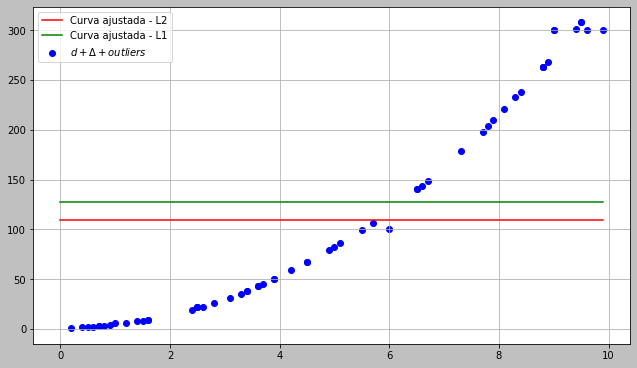

In [26]:
G_=PolynomialOrder(G,0)
ml21=L2Solution(G_,d_all)
ml11=L1Solution(G_,d_all,ml21,1000)
d_hat_l2=PredictMSE(G_,ml21,d_all)
d_hat_l1=PredictMSE(G_,ml11,d_all)
PlotCurveFits(trab1_df,d_all,d_hat_l2,d_hat_l1,2)

#### Polinômio de grau 1

Polinômio de grau 1 ajustado ao conjunto de dados: $\mathbf{d}$

Reached max number of iterations: 1000
Reached max number of iterations: 1000
Reached max number of iterations: 1000
MSE da solução para (d): 717.8138608017912
MSE da solução para (d + delta): 716.9024125737876
MSE da solução para (d + delta + outliers): 722.4555465789681
MSE da solução para (d): 732.373765514078
MSE da solução para (d + delta): 731.4283388616662
MSE da solução para (d + delta + outliers): 726.6598493090531


()

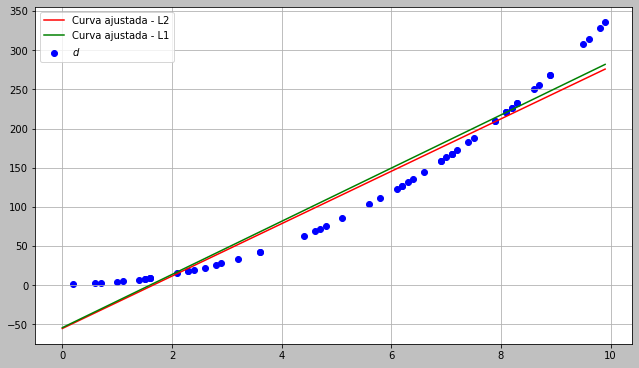

In [27]:
G_=PolynomialOrder(G,1)
ml21=L2Solution(G_,d_all)
ml11=L1Solution(G_,d_all,ml21,1000)
d_hat_l2=PredictMSE(G_,ml21,d_all)
d_hat_l1=PredictMSE(G_,ml11,d_all)
PlotCurveFits(trab1_df,d_all,d_hat_l2,d_hat_l1,0)

Polinômio de grau 1 ajustado ao conjunto de dados: $\mathbf{d} + \Delta$

Reached max number of iterations: 1000
Reached max number of iterations: 1000
Reached max number of iterations: 1000
MSE da solução para (d): 717.8138608017912
MSE da solução para (d + delta): 716.9024125737876
MSE da solução para (d + delta + outliers): 722.4555465789681
MSE da solução para (d): 732.373765514078
MSE da solução para (d + delta): 731.4283388616662
MSE da solução para (d + delta + outliers): 726.6598493090531


()

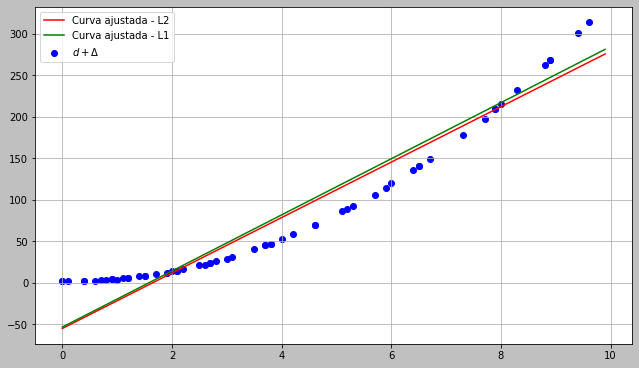

In [28]:
G_=PolynomialOrder(G,1)
ml21=L2Solution(G_,d_all)
ml11=L1Solution(G_,d_all,ml21,1000)
d_hat_l2=PredictMSE(G_,ml21,d_all)
d_hat_l1=PredictMSE(G_,ml11,d_all)
PlotCurveFits(trab1_df,d_all,d_hat_l2,d_hat_l1,1)

Polinômio de grau 1 ajustado ao conjunto de dados: $\mathbf{d} + \Delta + outliers$

Reached max number of iterations: 1000
Reached max number of iterations: 1000
Reached max number of iterations: 1000
MSE da solução para (d): 717.8138608017912
MSE da solução para (d + delta): 716.9024125737876
MSE da solução para (d + delta + outliers): 722.4555465789681
MSE da solução para (d): 732.373765514078
MSE da solução para (d + delta): 731.4283388616662
MSE da solução para (d + delta + outliers): 726.6598493090531


()

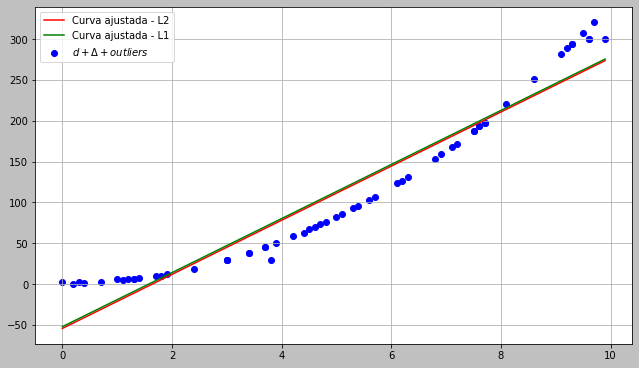

In [29]:
G_=PolynomialOrder(G,1)
ml21=L2Solution(G_,d_all)
ml11=L1Solution(G_,d_all,ml21,1000)
d_hat_l2=PredictMSE(G_,ml21,d_all)
d_hat_l1=PredictMSE(G_,ml11,d_all)
PlotCurveFits(trab1_df,d_all,d_hat_l2,d_hat_l1,2)

#### Polinômio de grau 2

Polinômio de grau 2 ajustado ao conjunto de dados: $\mathbf{d}$

Reached max number of iterations: 1000
Reached max number of iterations: 1000
Reached max number of iterations: 1000
MSE da solução para (d): 0.5706310850710568
MSE da solução para (d + delta): 0.8096421496818084
MSE da solução para (d + delta + outliers): 29.9660162619747
MSE da solução para (d): 0.5758925614414993
MSE da solução para (d + delta): 0.8168416596941994
MSE da solução para (d + delta + outliers): 38.01251074566244


()

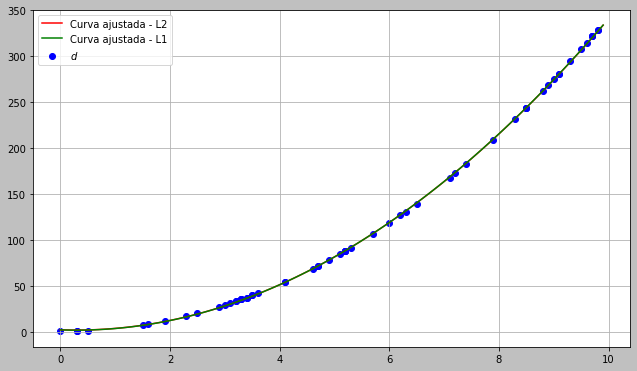

In [30]:
G_=PolynomialOrder(G,2)
ml21=L2Solution(G_,d_all)
ml11=L1Solution(G_,d_all,ml21,1000)
d_hat_l2=PredictMSE(G_,ml21,d_all)
d_hat_l1=PredictMSE(G_,ml11,d_all)
PlotCurveFits(trab1_df,d_all,d_hat_l2,d_hat_l1,0)

Polinômio de grau 2 ajustado ao conjunto de dados: $\mathbf{d} + \Delta$

Reached max number of iterations: 1000
Reached max number of iterations: 1000
Reached max number of iterations: 1000
MSE da solução para (d): 0.5706310850710568
MSE da solução para (d + delta): 0.8096421496818084
MSE da solução para (d + delta + outliers): 29.9660162619747
MSE da solução para (d): 0.5758925614414993
MSE da solução para (d + delta): 0.8168416596941994
MSE da solução para (d + delta + outliers): 38.01251074566244


()

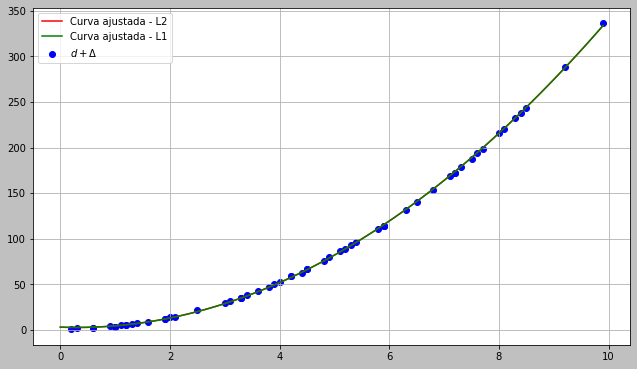

In [31]:
G_=PolynomialOrder(G,2)
ml21=L2Solution(G_,d_all)
ml11=L1Solution(G_,d_all,ml21,1000)
d_hat_l2=PredictMSE(G_,ml21,d_all)
d_hat_l1=PredictMSE(G_,ml11,d_all)
PlotCurveFits(trab1_df,d_all,d_hat_l2,d_hat_l1,1)

Polinômio de grau 2 ajustado ao conjunto de dados: $\mathbf{d} + \Delta + outliers$

Reached max number of iterations: 1000
Reached max number of iterations: 1000
Reached max number of iterations: 1000
MSE da solução para (d): 0.5706310850710568
MSE da solução para (d + delta): 0.8096421496818084
MSE da solução para (d + delta + outliers): 29.9660162619747
MSE da solução para (d): 0.5758925614414993
MSE da solução para (d + delta): 0.8168416596941994
MSE da solução para (d + delta + outliers): 38.01251074566244


()

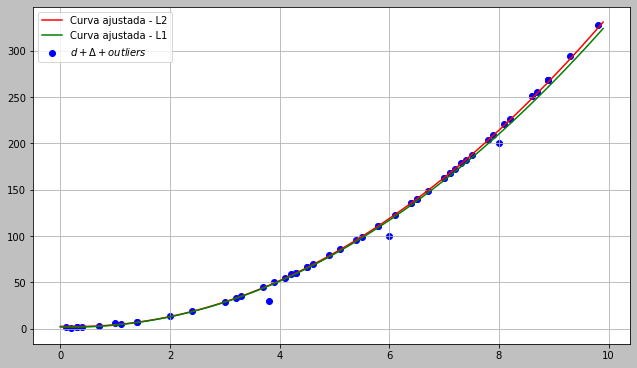

In [32]:
G_=PolynomialOrder(G,2)
ml21=L2Solution(G_,d_all)
ml11=L1Solution(G_,d_all,ml21,1000)
d_hat_l2=PredictMSE(G_,ml21,d_all)
d_hat_l1=PredictMSE(G_,ml11,d_all)
PlotCurveFits(trab1_df,d_all,d_hat_l2,d_hat_l1,2)

#### Polinômio de grau 3

Polinômio de grau 3 ajustado ao conjunto de dados: $\mathbf{d}$

Reached tolerance: 8.792706838350452e-06 <= 0.001
Reached max number of iterations: 1000
Reached max number of iterations: 1000
MSE da solução para (d): 7.968734008993121e-10
MSE da solução para (d + delta): 0.3004134178187431
MSE da solução para (d + delta + outliers): 29.959691571046783
MSE da solução para (d): 9.203592438092233e-10
MSE da solução para (d + delta): 0.3034406550703707
MSE da solução para (d + delta + outliers): 30.488650185606172


()

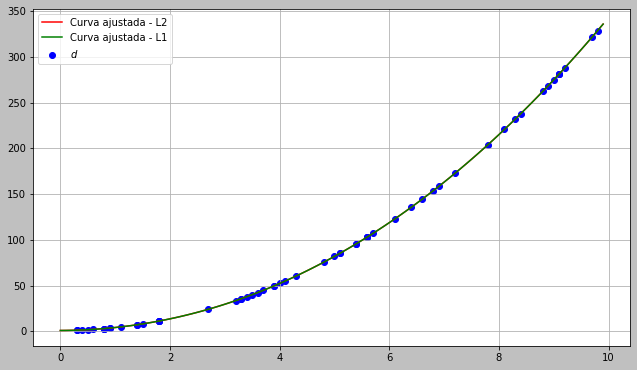

In [33]:
G_=PolynomialOrder(G,3)
ml21=L2Solution(G_,d_all)
ml11=L1Solution(G_,d_all,ml21,1000)
d_hat_l2=PredictMSE(G_,ml21,d_all)
d_hat_l1=PredictMSE(G_,ml11,d_all)
PlotCurveFits(trab1_df,d_all,d_hat_l2,d_hat_l1,0)

Polinômio de grau 3 ajustado ao conjunto de dados: $\mathbf{d} + \Delta$

Reached tolerance: 8.792706838350452e-06 <= 0.001
Reached max number of iterations: 1000
Reached max number of iterations: 1000
MSE da solução para (d): 7.968734008993121e-10
MSE da solução para (d + delta): 0.3004134178187431
MSE da solução para (d + delta + outliers): 29.959691571046783
MSE da solução para (d): 9.203592438092233e-10
MSE da solução para (d + delta): 0.3034406550703707
MSE da solução para (d + delta + outliers): 30.488650185606172


()

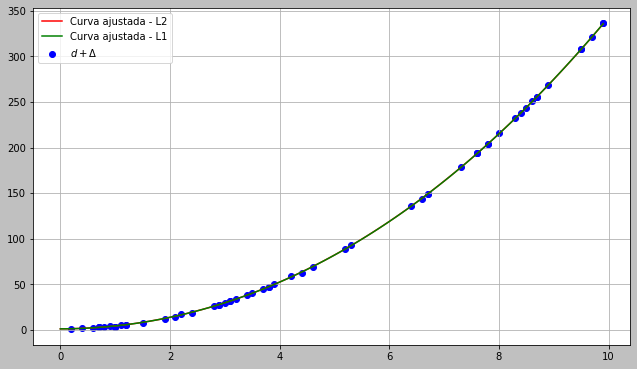

In [34]:
G_=PolynomialOrder(G,3)
ml21=L2Solution(G_,d_all)
ml11=L1Solution(G_,d_all,ml21,1000)
d_hat_l2=PredictMSE(G_,ml21,d_all)
d_hat_l1=PredictMSE(G_,ml11,d_all)
PlotCurveFits(trab1_df,d_all,d_hat_l2,d_hat_l1,1)

Polinômio de grau 3 ajustado ao conjunto de dados: $\mathbf{d} + \Delta + outliers$

Reached tolerance: 8.792706838350452e-06 <= 0.001
Reached max number of iterations: 1000
Reached max number of iterations: 1000
MSE da solução para (d): 7.968734008993121e-10
MSE da solução para (d + delta): 0.3004134178187431
MSE da solução para (d + delta + outliers): 29.959691571046783
MSE da solução para (d): 9.203592438092233e-10
MSE da solução para (d + delta): 0.3034406550703707
MSE da solução para (d + delta + outliers): 30.488650185606172


()

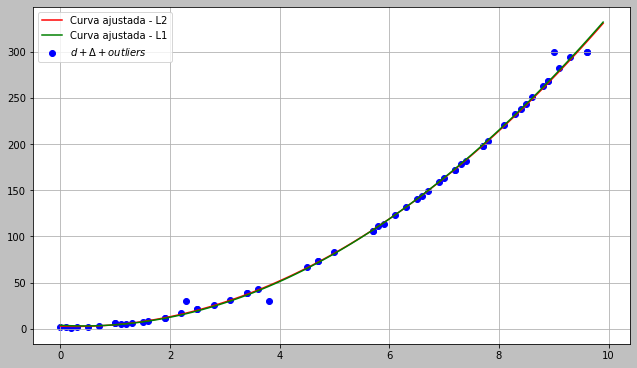

In [35]:
G_=PolynomialOrder(G,3)
ml21=L2Solution(G_,d_all)
ml11=L1Solution(G_,d_all,ml21,1000)
d_hat_l2=PredictMSE(G_,ml21,d_all)
d_hat_l1=PredictMSE(G_,ml11,d_all)
PlotCurveFits(trab1_df,d_all,d_hat_l2,d_hat_l1,2)

#### Polinômio de grau 4

Polinômio de grau 4 ajustado ao conjunto de dados: $\mathbf{d}$

Reached tolerance: 6.546363308205284e-06 <= 0.001
Reached max number of iterations: 1000
Reached max number of iterations: 1000
MSE da solução para (d): 7.968452338705657e-10
MSE da solução para (d + delta): 0.2905582356662665
MSE da solução para (d + delta + outliers): 28.028636686653446
MSE da solução para (d): 8.943421525843953e-10
MSE da solução para (d + delta): 0.29184953440273076
MSE da solução para (d + delta + outliers): 29.86486802368977


()

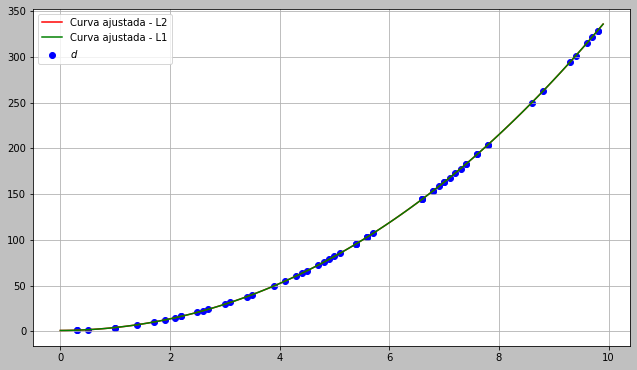

In [36]:
G_=PolynomialOrder(G,4)
ml21=L2Solution(G_,d_all)
ml11=L1Solution(G_,d_all,ml21,1000)
d_hat_l2=PredictMSE(G_,ml21,d_all)
d_hat_l1=PredictMSE(G_,ml11,d_all)
PlotCurveFits(trab1_df,d_all,d_hat_l2,d_hat_l1,0)

Polinômio de grau 4 ajustado ao conjunto de dados: $\mathbf{d} + \Delta$

Reached tolerance: 6.546363308205284e-06 <= 0.001
Reached max number of iterations: 1000
Reached max number of iterations: 1000
MSE da solução para (d): 7.968452338705657e-10
MSE da solução para (d + delta): 0.2905582356662665
MSE da solução para (d + delta + outliers): 28.028636686653446
MSE da solução para (d): 8.943421525843953e-10
MSE da solução para (d + delta): 0.29184953440273076
MSE da solução para (d + delta + outliers): 29.86486802368977


()

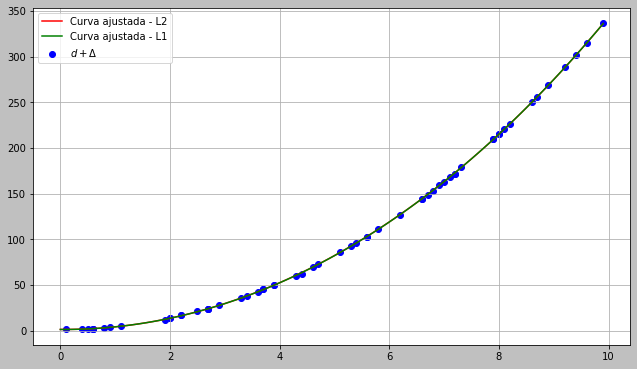

In [37]:
G_=PolynomialOrder(G,4)
ml21=L2Solution(G_,d_all)
ml11=L1Solution(G_,d_all,ml21,1000)
d_hat_l2=PredictMSE(G_,ml21,d_all)
d_hat_l1=PredictMSE(G_,ml11,d_all)
PlotCurveFits(trab1_df,d_all,d_hat_l2,d_hat_l1,1)

Polinômio de grau 4 ajustado ao conjunto de dados: $\mathbf{d} + \Delta + outliers$

Reached tolerance: 6.546363308205284e-06 <= 0.001
Reached max number of iterations: 1000
Reached max number of iterations: 1000
MSE da solução para (d): 7.968452338705657e-10
MSE da solução para (d + delta): 0.2905582356662665
MSE da solução para (d + delta + outliers): 28.028636686653446
MSE da solução para (d): 8.943421525843953e-10
MSE da solução para (d + delta): 0.29184953440273076
MSE da solução para (d + delta + outliers): 29.86486802368977


()

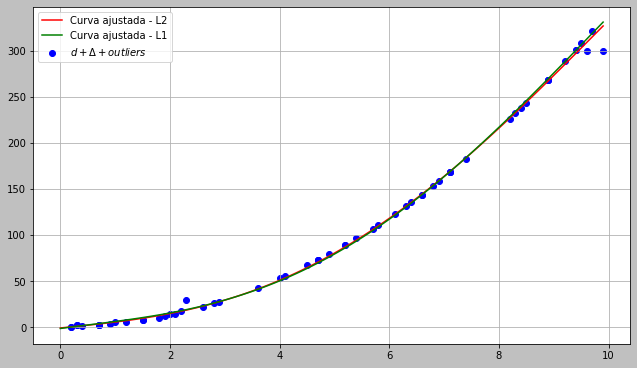

In [38]:
G_=PolynomialOrder(G,4)
ml21=L2Solution(G_,d_all)
ml11=L1Solution(G_,d_all,ml21,1000)
d_hat_l2=PredictMSE(G_,ml21,d_all)
d_hat_l1=PredictMSE(G_,ml11,d_all)
PlotCurveFits(trab1_df,d_all,d_hat_l2,d_hat_l1,2)

#### Polinômio de grau 5

Polinômio de grau 5 ajustado ao conjunto de dados: $\mathbf{d}$

Reached tolerance: 2.9226932655787982e-05 <= 0.001
Reached max number of iterations: 1000
Reached max number of iterations: 1000
MSE da solução para (d): 7.935243225359561e-10
MSE da solução para (d + delta): 0.2809118095816746
MSE da solução para (d + delta + outliers): 25.9269562534377
MSE da solução para (d): 1.0133081107408893e-09
MSE da solução para (d + delta): 0.28413217672125496
MSE da solução para (d + delta + outliers): 27.557505415237006


()

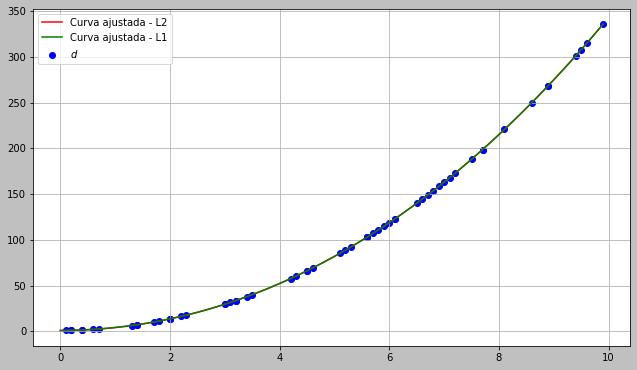

In [39]:
G_=PolynomialOrder(G,5)
ml21=L2Solution(G_,d_all)
ml11=L1Solution(G_,d_all,ml21,1000)
d_hat_l2=PredictMSE(G_,ml21,d_all)
d_hat_l1=PredictMSE(G_,ml11,d_all)
PlotCurveFits(trab1_df,d_all,d_hat_l2,d_hat_l1,0)

Polinômio de grau 5 ajustado ao conjunto de dados: $\mathbf{d} + \Delta$

Reached tolerance: 2.9226932655787982e-05 <= 0.001
Reached max number of iterations: 1000
Reached max number of iterations: 1000
MSE da solução para (d): 7.935243225359561e-10
MSE da solução para (d + delta): 0.2809118095816746
MSE da solução para (d + delta + outliers): 25.9269562534377
MSE da solução para (d): 1.0133081107408893e-09
MSE da solução para (d + delta): 0.28413217672125496
MSE da solução para (d + delta + outliers): 27.557505415237006


()

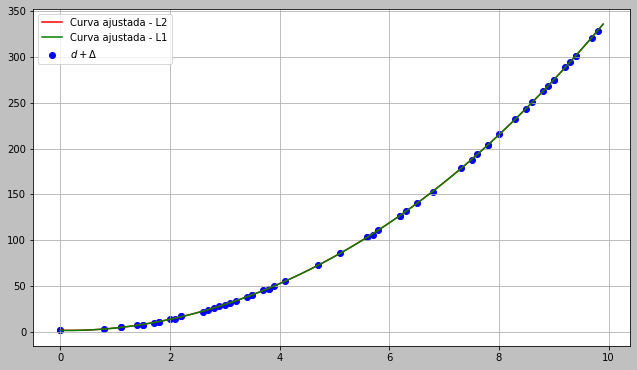

In [40]:
G_=PolynomialOrder(G,5)
ml21=L2Solution(G_,d_all)
ml11=L1Solution(G_,d_all,ml21,1000)
d_hat_l2=PredictMSE(G_,ml21,d_all)
d_hat_l1=PredictMSE(G_,ml11,d_all)
PlotCurveFits(trab1_df,d_all,d_hat_l2,d_hat_l1,1)

Polinômio de grau 5 ajustado ao conjunto de dados: $\mathbf{d} + \Delta + outliers$

Reached tolerance: 2.9226932655787982e-05 <= 0.001
Reached max number of iterations: 1000
Reached max number of iterations: 1000
MSE da solução para (d): 7.935243225359561e-10
MSE da solução para (d + delta): 0.2809118095816746
MSE da solução para (d + delta + outliers): 25.9269562534377
MSE da solução para (d): 1.0133081107408893e-09
MSE da solução para (d + delta): 0.28413217672125496
MSE da solução para (d + delta + outliers): 27.557505415237006


()

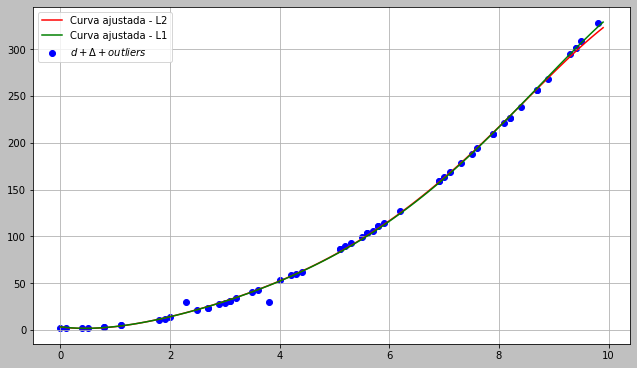

In [41]:
G_=PolynomialOrder(G,5)
ml21=L2Solution(G_,d_all)
ml11=L1Solution(G_,d_all,ml21,1000)
d_hat_l2=PredictMSE(G_,ml21,d_all)
d_hat_l1=PredictMSE(G_,ml11,d_all)
PlotCurveFits(trab1_df,d_all,d_hat_l2,d_hat_l1,2)

### Conclusão BÔNUS

Os diferentes graus de polinômios testados reforçam a conclusão prévia de que não era possível inferir exatamente qual a função originou as observações, uma vez que curvas polinomiais de 2°, 3° e 4° explicaram igualmente bem os dados. 

#### Referências

Aster, R., Borchers, B., Thurber, C., Parameter Estimation and Inverse Problems, Third Edition, Elsevier Academic Press, 404 pp., 2018. 

In [ ]:
####################################################################################################################